## Final Project Submission

Please fill out:
* Student name: Henry Van Gorp
* Student pace: self paced
* Scheduled project review date/time: TBD
* Instructor name: Abhineet Kulkarni
* Blog post URL: TBD


# Business Understanding

A real estate investment company which is new to the northwest is looking to understand how the homes in King County, Washington are being sold.  They are looking to understand how the attributes of a home increase the sale price. 

# Data Understanding

The data which is being utlized for this project focuses

### Import Packages

In [430]:
import warnings
warnings.filterwarnings('ignore')

In [431]:
# import necessary packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("./data/kc_house_data.csv")

data.reset_index(inplace = True)

In [432]:
data.head()

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [433]:
data.describe()

,index,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000000,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,10798.000000,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,6234.661218,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,0.000000,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5399.000000,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,10798.000000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,16197.000000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21596.000000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Data Preparation

### Data Info

Looking at null values, data types and column names

In [434]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          21597 non-null  int64  
 1   id             21597 non-null  int64  
 2   date           21597 non-null  object 
 3   price          21597 non-null  float64
 4   bedrooms       21597 non-null  int64  
 5   bathrooms      21597 non-null  float64
 6   sqft_living    21597 non-null  int64  
 7   sqft_lot       21597 non-null  int64  
 8   floors         21597 non-null  float64
 9   waterfront     19221 non-null  object 
 10  view           21534 non-null  object 
 11  condition      21597 non-null  object 
 12  grade          21597 non-null  object 
 13  sqft_above     21597 non-null  int64  
 14  sqft_basement  21597 non-null  object 
 15  yr_built       21597 non-null  int64  
 16  yr_renovated   17755 non-null  float64
 17  zipcode        21597 non-null  int64  
 18  lat   

### Check Null Values

An overview of null values in the datasets columns.

In [435]:
data.isna().sum()

index               0
id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

# Clean Data

### Squarefeet Basement

Squarefeet basement was listed as an object.  To make clean this category we replaced the '?" will null values.  After changing the dat type from an object to a float we filled the null values with the mean of the overall column.  Rather than determining if there is a basement or not, we kept the square footage to see if price goes up with square footage.

In [436]:
data['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1008.0        1
1275.0        1
65.0          1
1798.0        1
1284.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [437]:
data['sqft_basement'].replace('?',np.nan,inplace=True)

In [438]:
data.sqft_basement = data.sqft_basement.astype("float")

In [439]:
data.sqft_basement.fillna(data['sqft_basement'].mean(),inplace=True)

### Waterfront

Waterfront had null values.  The assumption is that null values represent that there is no waterfront.
Renamed yes to waterfront as 1 and no to waterfront as 0.

In [440]:
data['waterfront'].value_counts(normalize=True)

NO     0.992404
YES    0.007596
Name: waterfront, dtype: float64

In [441]:
data['waterfront'].fillna('NO', inplace=True)

In [442]:
data['waterfront'] = data.waterfront.map({'NO': 0, 'YES': 1})

In [443]:
data['waterfront'].value_counts()

0    21451
1      146
Name: waterfront, dtype: int64

### Renovated

Change the structure of the data to represent 1 as renovated and 0 as not renovated.  Null values were changed to not renovated under assumption.

In [444]:
data['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [445]:
data['yr_renovated'].fillna(0.0, inplace=True)

In [446]:
data['yr_renovated']=data['yr_renovated'].apply(lambda x: 1 if x!=0 else x)

In [447]:
data['yr_renovated'].value_counts()

0.0    20853
1.0      744
Name: yr_renovated, dtype: int64

<AxesSubplot:xlabel='yr_renovated', ylabel='price'>

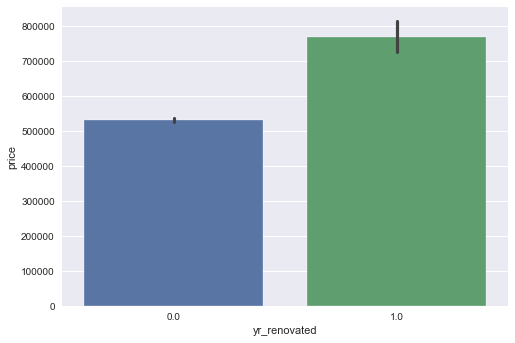

In [448]:
sns.barplot(x = 'yr_renovated', y = 'price', data=data)

### View

In [449]:
data['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

<AxesSubplot:xlabel='view', ylabel='price'>

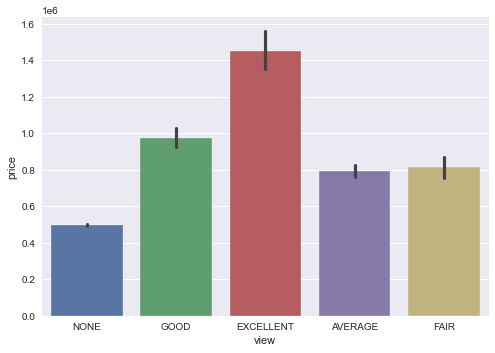

In [450]:
sns.barplot(x = 'view', y = 'price', data=data)

In [451]:
data['view'].fillna('NONE', inplace=True)

In [452]:
data['view']=data['view'].apply(lambda x: 0 if x== 'NONE' else 1)

In [453]:
data['view'].value_counts()

0    19485
1     2112
Name: view, dtype: int64

### Year Built

In [454]:
data['yr_built'].value_counts()

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [455]:
data['yr_built']=data['yr_built'].apply(lambda x: 0 if x> 1980 else 1)

In [456]:
data['yr_built'].value_counts()

1    12568
0     9029
Name: yr_built, dtype: int64

### Grade

Create dummy variables for grade.

In [457]:
data['grade'].value_counts(normalize=True)

7 Average        0.415521
8 Good           0.280826
9 Better         0.121082
6 Low Average    0.094365
10 Very Good     0.052507
11 Excellent     0.018475
5 Fair           0.011205
12 Luxury        0.004121
4 Low            0.001250
13 Mansion       0.000602
3 Poor           0.000046
Name: grade, dtype: float64

In [458]:
grade_dummies = pd.get_dummies(data['grade'], prefix='grd', drop_first=True)

In [459]:
data = data.drop(['grade'], axis=1)

In [460]:
data = pd.concat([data, grade_dummies], axis=1)
data.head()

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grd_11 Excellent,grd_12 Luxury,grd_13 Mansion,grd_3 Poor,grd_4 Low,grd_5 Fair,grd_6 Low Average,grd_7 Average,grd_8 Good,grd_9 Better
0,0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,...,0,0,0,0,0,0,0,1,0,0
2,2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,...,0,0,0,0,0,0,1,0,0,0
3,3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,...,0,0,0,0,0,0,0,1,0,0
4,4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,...,0,0,0,0,0,0,0,0,1,0


### Condition

Create dummy variables for condition.

In [461]:
data['condition'].value_counts(normalize=True)

Average      0.649164
Good         0.262861
Very Good    0.078761
Fair         0.007871
Poor         0.001343
Name: condition, dtype: float64

In [462]:
condition_dummies = pd.get_dummies(data['condition'], prefix='cnd', drop_first=True)

In [463]:
data = data.drop(['condition'], axis=1)

In [464]:
data = pd.concat([data, condition_dummies], axis=1)
data.head()

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grd_4 Low,grd_5 Fair,grd_6 Low Average,grd_7 Average,grd_8 Good,grd_9 Better,cnd_Fair,cnd_Good,cnd_Poor,cnd_Very Good
0,0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,...,0,0,0,1,0,0,0,0,0,0
2,2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,...,0,0,0,1,0,0,0,0,0,1
4,4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,...,0,0,0,0,1,0,0,0,0,0


# Visualizing Distributions

### Histograms

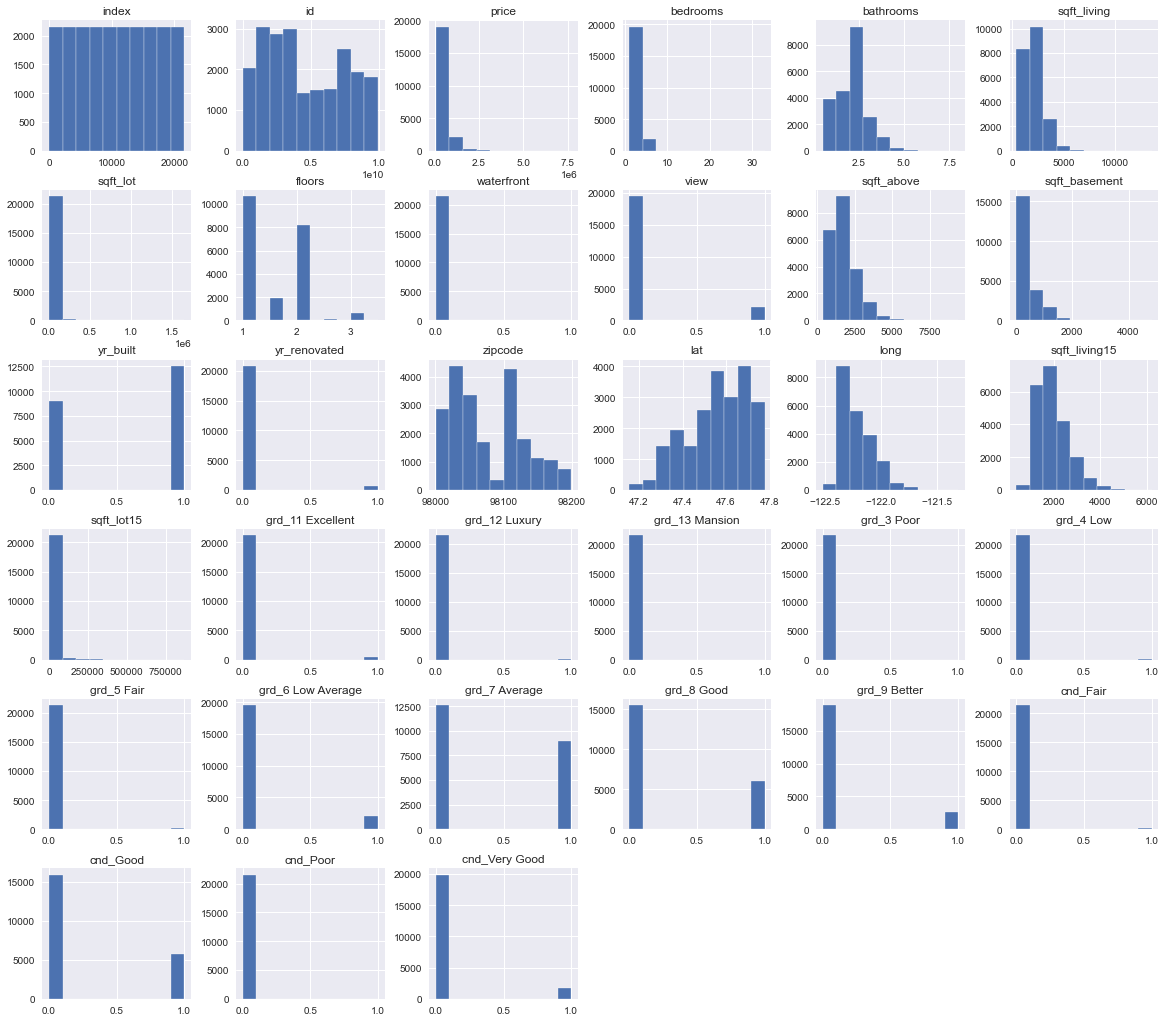

In [465]:
data.hist(figsize = (20, 18));

### Check for Linearity

Checking for linearity between price and the squarefeet of living space.  sqft_living seems to have a linear relationship with list_price.

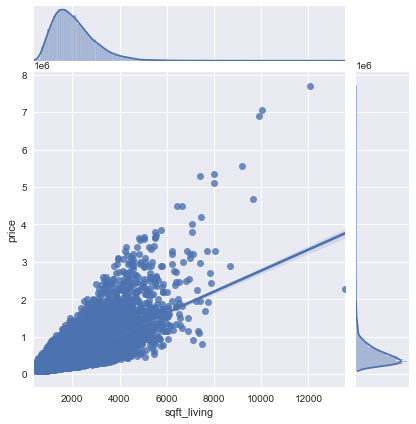

In [466]:
sns.jointplot('sqft_living', 'price', data=data, kind='reg')
plt.style.use('seaborn')
sns.set_style("darkgrid")

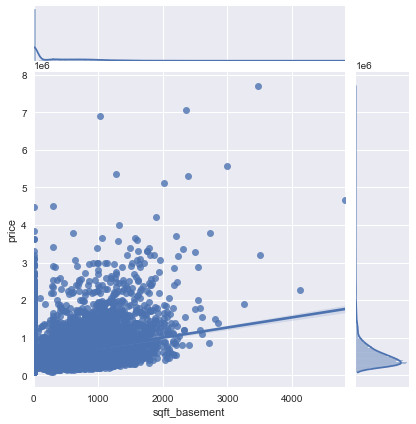

In [467]:
sns.jointplot('sqft_basement', 'price', data=data, kind='reg')
plt.style.use('seaborn')
sns.set_style("darkgrid")

Checking for linearity between price and the amount of floors.  Seems that price and floors has a slight linear relationship.

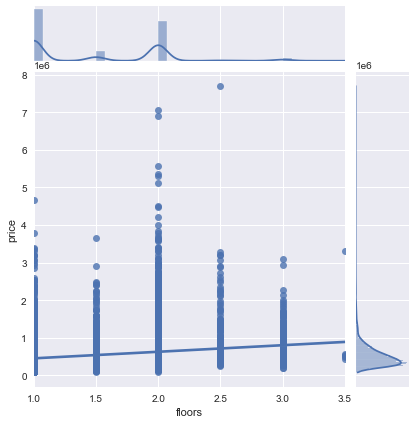

In [468]:
sns.jointplot('floors', 'price', data=data, kind='reg')
plt.style.use('seaborn')
sns.set_style("darkgrid")

Checking for linearity between price and bathrooms.  Bathrooms and price have a linear relationship.

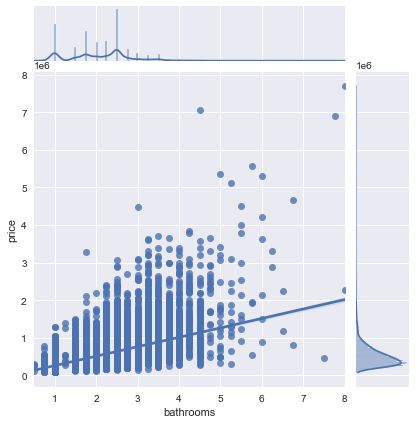

In [469]:
sns.jointplot('bathrooms', 'price', data=data, kind='reg')
plt.style.use('seaborn')
sns.set_style("darkgrid")

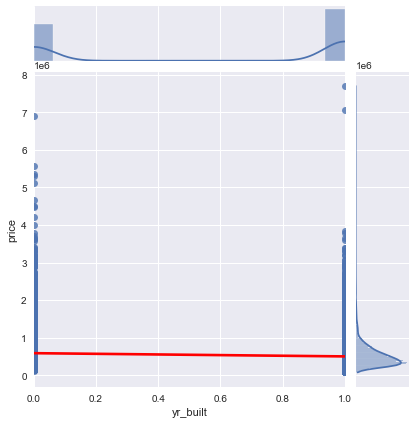

In [470]:
g = sns.jointplot('yr_built', 'price', data=data, kind='reg')
regline = g.ax_joint.get_lines()[0]
regline.set_color('red')
plt.style.use('seaborn')
sns.set_style("darkgrid")

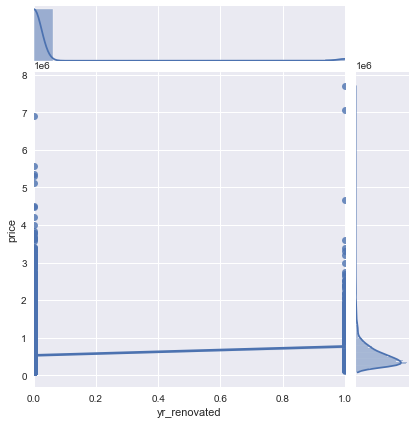

In [471]:
sns.jointplot('yr_renovated', 'price', data=data, kind='reg')
plt.style.use('seaborn')
sns.set_style("darkgrid")

### Check for Multicolinearity

<AxesSubplot:>

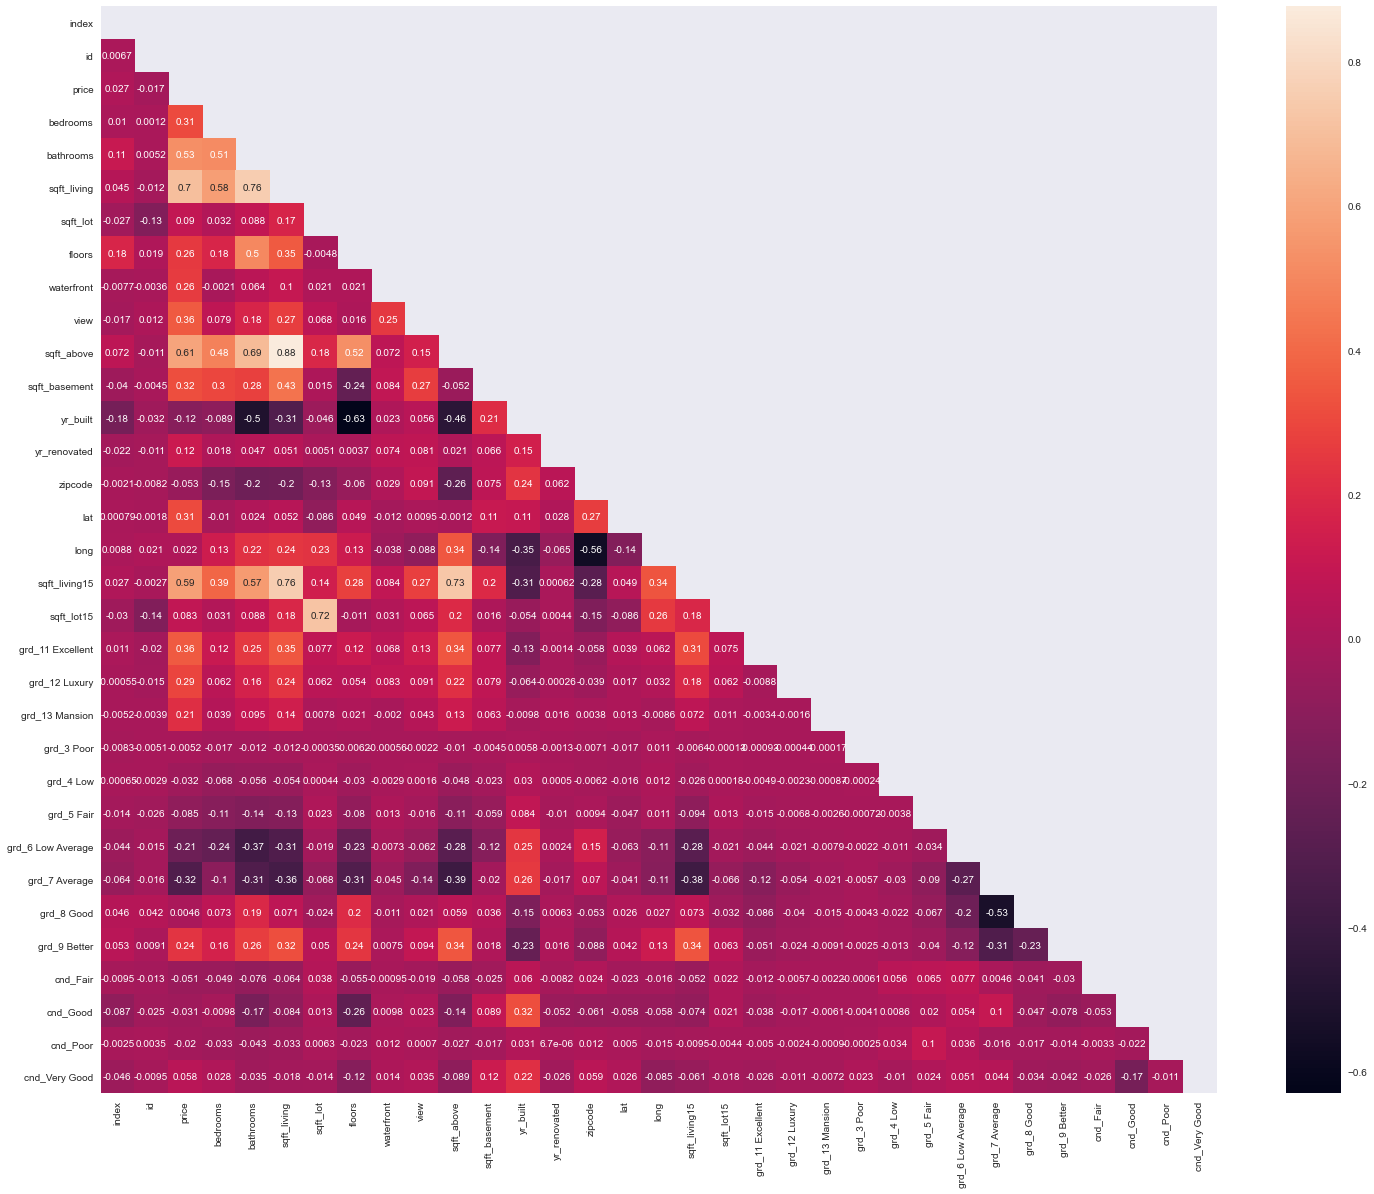

In [472]:
corr = data.corr()
trimask = np.triu(np.ones_like(corr, dtype = 'bool'))
plt.figure(figsize=(25,20))
sns.heatmap(corr, mask = trimask, annot = True)

# Modeling

### Create Baseline Model

In [473]:
price = data['price']

In [474]:
features = ['sqft_living', 'sqft_above', 'bathrooms', 'bedrooms', 'floors', 'sqft_lot', 'sqft_basement',
            'waterfront', 'view', 'sqft_living15']

In [475]:
model_data = data.loc[:, features]

In [476]:
import statsmodels.api as sm

baseline_model = sm.OLS(price, model_data).fit()
baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.862
Model:                            OLS   Adj. R-squared (uncentered):              0.862
Method:                 Least Squares   F-statistic:                          1.345e+04
Date:                Sat, 05 Feb 2022   Prob (F-statistic):                        0.00
Time:                        21:33:48   Log-Likelihood:                     -2.9846e+05
No. Observations:               21597   AIC:                                  5.969e+05
Df Residuals:                   21587   BIC:                                  5.970e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
sqft_living     211.0709     25.542      8.264      0.000     161.007     261.135
sqft_above       35.7203     25.579      1.396      0.163     -14.417      85.858
bathrooms      4935.4826   3636.483      1.357      0.175   -2192.292    1.21e+04
bedrooms      -4.373e+04   1809.049    -24.172      0.000   -4.73e+04   -4.02e+04
floors         1.939e+04   3700.294      5.241      0.000    1.21e+04    2.66e+04
sqft_lot         -0.3675      0.041     -8.986      0.000      -0.448      -0.287
sqft_basement    58.6411     25.606      2.290      0.022       8.451     108.831
waterfront     7.035e+05   2.09e+04     33.675      0.000    6.63e+05    7.44e+05
view           1.551e+05   6124.898     25.320      0.000    1.43e+05    1.67e+05
sqft_living15    57.0371      3.451     16.528      0.000      50.273      63.801
==============================================================================
Omnibus:                    13920.727   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           548164.712
Skew:                           2.543   Prob(JB):                         0.00
Kurtosis:                      27.151   Cond. No.                     5.58e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.58e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

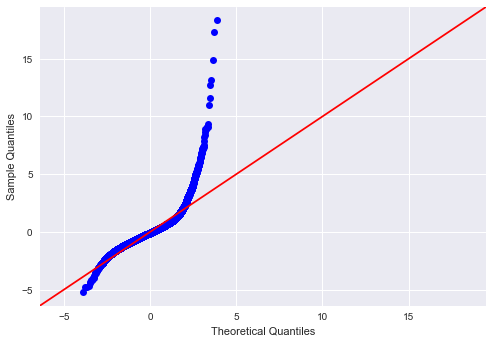

In [477]:
import scipy.stats as stats

fig = sm.graphics.qqplot(baseline_model.resid, dist=stats.norm, line='45', fit=True)

plt.scatter(baseline_model.predict(data[x_cols]), baseline_model.resid)
plt.plot(baseline_model.predict(data[x_cols]), [0 for i in range(len(data))])

### Second Model Dropping Features

In [478]:
features_2 = ['sqft_living', 'bedrooms', 'floors', 'sqft_lot', 'yr_built',
           'yr_renovated', 'waterfront', 'view', 'sqft_living15']

In [479]:
model_data2 = data.loc[:, features_2]

In [480]:
model2 = sm.OLS(price, model_data2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.866
Model:                            OLS   Adj. R-squared (uncentered):              0.866
Method:                 Least Squares   F-statistic:                          1.554e+04
Date:                Sat, 05 Feb 2022   Prob (F-statistic):                        0.00
Time:                        21:33:48   Log-Likelihood:                     -2.9810e+05
No. Observations:               21597   AIC:                                  5.962e+05
Df Residuals:                   21588   BIC:                                  5.963e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
sqft_living     275.1560      3.127     88.004      0.000     269.028     281.284
bedrooms      -6.786e+04   2009.966    -33.760      0.000   -7.18e+04   -6.39e+04
floors          3.51e+04   3032.539     11.576      0.000    2.92e+04     4.1e+04
sqft_lot         -0.4064      0.040    -10.150      0.000      -0.485      -0.328
yr_built       8.075e+04   3449.974     23.405      0.000     7.4e+04    8.75e+04
yr_renovated   9.418e+04   9122.194     10.324      0.000    7.63e+04    1.12e+05
waterfront     6.712e+05   2.06e+04     32.612      0.000    6.31e+05    7.12e+05
view           1.416e+05   5954.853     23.775      0.000     1.3e+05    1.53e+05
sqft_living15    43.3721      3.386     12.808      0.000      36.735      50.010
==============================================================================
Omnibus:                    14211.529   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           573049.876
Skew:                           2.617   Prob(JB):                         0.00
Kurtosis:                      27.687   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

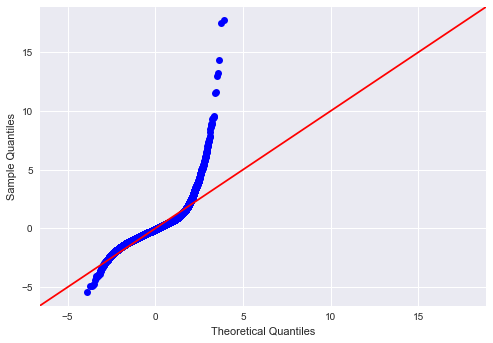

In [481]:
fig = sm.graphics.qqplot(model2.resid, dist=stats.norm, line='45', fit=True)

### Remodeling with price log transformation

Run a log function to change the structure of price to make it normally distirbuted.

In [414]:
p = np.log(data.price)

<AxesSubplot:xlabel='price', ylabel='Count'>

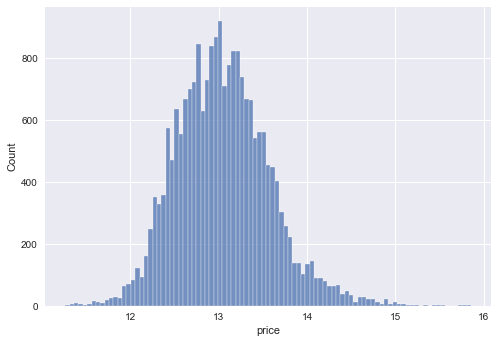

In [415]:
sns.histplot(p)

In [416]:
features_3 = ['sqft_living', 'bedrooms', 'floors', 'sqft_lot', 'yr_built',
           'yr_renovated', 'waterfront', 'view', 'sqft_living15']

In [417]:
model_data3 = data.loc[:, features_3]

In [418]:
model3 = sm.OLS(p, model_data3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                          1.094e+05
Date:                Sat, 05 Feb 2022   Prob (F-statistic):                        0.00
Time:                        21:28:34   Log-Likelihood:                         -44647.
No. Observations:               21597   AIC:                                  8.931e+04
Df Residuals:                   21588   BIC:                                  8.938e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
sqft_living      -0.0006    2.5e-05    -23.540      0.000      -0.001      -0.001
bedrooms          0.9904      0.016     61.566      0.000       0.959       1.022
floors            3.2242      0.024    132.840      0.000       3.177       3.272
sqft_lot       3.235e-06    3.2e-07     10.093      0.000    2.61e-06    3.86e-06
yr_built          3.4965      0.028    126.629      0.000       3.442       3.551
yr_renovated     -0.7246      0.073     -9.925      0.000      -0.868      -0.582
waterfront        0.3665      0.165      2.225      0.026       0.044       0.689
view             -0.4840      0.048    -10.156      0.000      -0.577      -0.391
sqft_living15     0.0019   2.71e-05     70.631      0.000       0.002       0.002
==============================================================================
Omnibus:                     1791.888   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8944.399
Skew:                          -0.246   Prob(JB):                         0.00
Kurtosis:                       6.114   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [419]:
import statsmodels.api as sm
import scipy.stats as stats

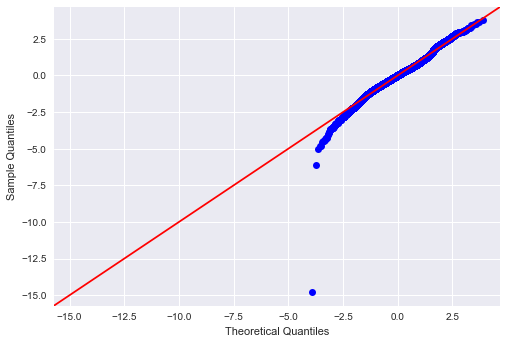

In [420]:
fig = sm.graphics.qqplot(model3.resid, dist=stats.norm, line='45', fit=True)

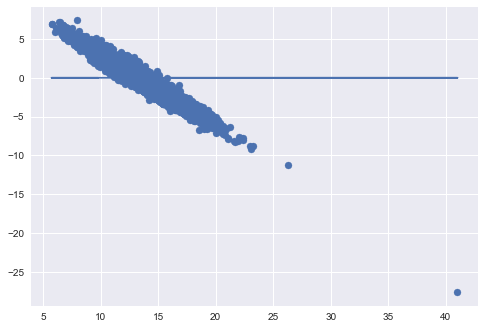

In [421]:
plt.scatter(model3.predict(data[features_3]), model3.resid)
plt.plot(model3.predict(data[features_3]), [0 for i in range(len(data))])

### Remodeling After checking Multicolinearity

In [422]:
data.corr()

,index,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grd_4 Low,grd_5 Fair,grd_6 Low Average,grd_7 Average,grd_8 Good,grd_9 Better,cnd_Fair,cnd_Good,cnd_Poor,cnd_Very Good
index,1.000000,0.006694,0.027436,0.010030,0.107057,0.044874,-0.027180,0.180026,-0.007702,-0.016796,...,-0.000655,-0.013969,-0.044127,-0.064322,0.046272,0.053397,-0.009504,-0.087085,-0.002490,-0.046247
id,0.006694,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.003599,0.011606,...,-0.002903,-0.025640,-0.015476,-0.015575,0.042285,0.009121,-0.012780,-0.025497,0.003471,-0.009534
price,0.027436,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.356243,...,-0.031618,-0.084549,-0.209463,-0.316053,0.004576,0.235859,-0.051432,-0.030759,-0.019886,0.057531
bedrooms,0.010030,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.079232,...,-0.068012,-0.113175,-0.239492,-0.104791,0.073140,0.160294,-0.049463,-0.009841,-0.032520,0.027500
bathrooms,0.107057,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.175884,...,-0.055599,-0.138740,-0.366185,-0.313457,0.189426,0.264756,-0.075933,-0.166756,-0.042932,-0.034765
sqft_living,0.044874,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.268465,...,-0.053935,-0.127198,-0.312486,-0.358915,0.071115,0.318499,-0.063984,-0.083850,-0.033246,-0.018284
sqft_lot,-0.027180,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.068216,...,0.000440,0.022931,-0.019116,-0.067791,-0.023923,0.049646,0.037871,0.013284,0.006265,-0.014452
floors,0.180026,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.016311,...,-0.029964,-0.080346,-0.230529,-0.308247,0.201188,0.244184,-0.055337,-0.257672,-0.023029,-0.120546
waterfront,-0.007702,-0.003599,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.248683,...,-0.002919,0.012691,-0.007301,-0.045482,-0.011317,0.007487,-0.000954,0.009785,0.012406,0.013637
view,-0.016796,0.011606,0.356243,0.079232,0.175884,0.268465,0.068216,0.016311,0.248683,1.000000,...,0.001587,-0.015795,-0.062015,-0.143475,0.021123,0.093790,-0.018741,0.023316,0.000698,0.034524


In [423]:
abs(data.corr()) > 0.75

,index,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grd_4 Low,grd_5 Fair,grd_6 Low Average,grd_7 Average,grd_8 Good,grd_9 Better,cnd_Fair,cnd_Good,cnd_Poor,cnd_Very Good
index,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
id,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
price,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [424]:
data = data.corr().abs().stack().reset_index().sort_values(0, ascending = False)

data['pairs'] = list(zip(data.level_0, data.level_1))

data.set_index(['pairs'], inplace = True)

data.drop(columns=['level_1', 'level_0'], inplace = True)

data.columns = ['cc']

data.drop_duplicates(inplace=True)

data[(data.cc>.75) & (data.cc<1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.876448
"(sqft_living15, sqft_living)",0.756402
"(sqft_living, bathrooms)",0.755758


In [ ]:
features_3 = ['sqft_living', 'bedrooms', 'floors', 'sqft_lot', 'yr_built',
           'yr_renovated', 'waterfront', 'view', 'sqft_living15']

In [427]:
features_4 = ['sqft_living', 'bedrooms', 'floors', 'sqft_lot', 'yr_built',
           'yr_renovated', 'waterfront', 'view', 'sqft_living15']

In [428]:
model_data4 = data.loc[:, features_4]

KeyError: "None of [Index(['sqft_living', 'bedrooms', 'floors', 'sqft_lot', 'yr_built',\n       'yr_renovated', 'waterfront', 'view', 'sqft_living15'],\n      dtype='object')] are in the [columns]"